In [6]:
import os
print(os.getcwd())

/root/household-power-forecasting/notebooks


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    "../data/processed/power_1min.csv",
    parse_dates=["Datetime"],
    index_col="Datetime"
)

df.head(), df.shape


(                     Global_active_power  Global_reactive_power  Voltage  \
 Datetime                                                                   
 2006-12-16 17:24:00                4.216                  0.418   234.84   
 2006-12-16 17:25:00                5.360                  0.436   233.63   
 2006-12-16 17:26:00                5.374                  0.498   233.29   
 2006-12-16 17:27:00                5.388                  0.502   233.74   
 2006-12-16 17:28:00                3.666                  0.528   235.68   
 
                      Global_intensity  Sub_metering_1  Sub_metering_2  \
 Datetime                                                                
 2006-12-16 17:24:00              18.4             0.0             1.0   
 2006-12-16 17:25:00              23.0             0.0             1.0   
 2006-12-16 17:26:00              23.0             0.0             2.0   
 2006-12-16 17:27:00              23.0             0.0             1.0   
 2006-12-16 17:

In [8]:
df.index.min(), df.index.max(), df.describe()


(Timestamp('2006-12-16 17:24:00'),
 Timestamp('2010-11-26 21:02:00'),
        Global_active_power  Global_reactive_power       Voltage  \
 count         2.075259e+06           2.075259e+06  2.075259e+06   
 mean          1.086168e+00           1.233280e-01  2.408416e+02   
 std           1.053172e+00           1.125144e-01  3.235574e+00   
 min           7.600000e-02           0.000000e+00  2.232000e+02   
 25%           3.080000e-01           4.800000e-02  2.390000e+02   
 50%           5.980000e-01           1.000000e-01  2.410200e+02   
 75%           1.524000e+00           1.940000e-01  2.428700e+02   
 max           1.112200e+01           1.390000e+00  2.541500e+02   
 
        Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
 count      2.075259e+06    2.075259e+06    2.075259e+06    2.075259e+06  
 mean       4.604226e+00    1.110995e+00    1.287958e+00    6.416570e+00  
 std        4.426775e+00    6.115908e+00    5.786865e+00    8.419505e+00  
 min        2.00

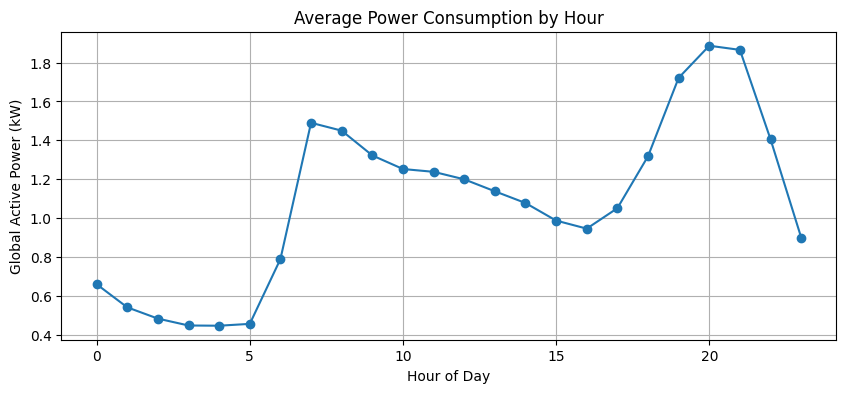

Datetime
0     0.659583
1     0.540739
2     0.482724
3     0.447379
4     0.446164
5     0.455703
6     0.788972
7     1.490076
8     1.449551
9     1.322167
10    1.252229
11    1.237853
12    1.199247
13    1.137712
14    1.077447
15    0.987055
16    0.945568
17    1.050723
18    1.317963
19    1.721268
20    1.886522
21    1.865132
22    1.405145
23    0.899950
Name: Global_active_power, dtype: float64

In [9]:
hourly_mean = df.groupby(df.index.hour)["Global_active_power"].mean()

plt.figure(figsize=(10,4))
hourly_mean.plot(marker="o")
plt.title("Average Power Consumption by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Global Active Power (kW)")
plt.grid(True)
plt.show()

hourly_mean


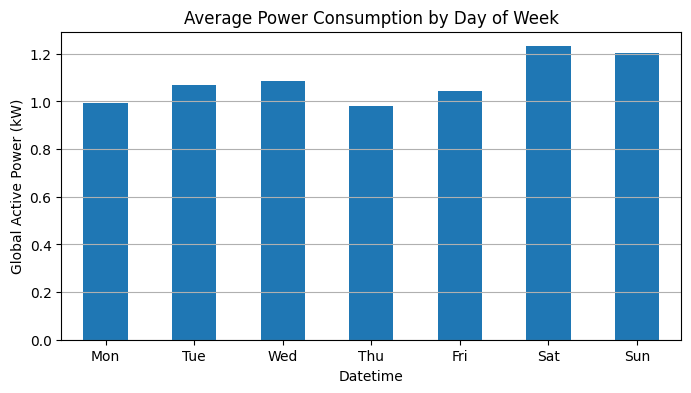

Datetime
0    0.992977
1    1.067148
2    1.084690
3    0.981797
4    1.042727
5    1.230914
6    1.203410
Name: Global_active_power, dtype: float64

In [10]:
weekday_mean = df.groupby(df.index.dayofweek)["Global_active_power"].mean()

plt.figure(figsize=(8,4))
weekday_mean.plot(kind="bar")
plt.xticks(range(7), ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], rotation=0)
plt.title("Average Power Consumption by Day of Week")
plt.ylabel("Global Active Power (kW)")
plt.grid(axis="y")
plt.show()

weekday_mean


In [11]:
threshold = df["Global_active_power"].quantile(0.9)
threshold


np.float64(2.458)

In [12]:
df["is_peak"] = (df["Global_active_power"] >= threshold).astype(int)

df["is_peak"].value_counts(normalize=True)


is_peak
0    0.899981
1    0.100019
Name: proportion, dtype: float64

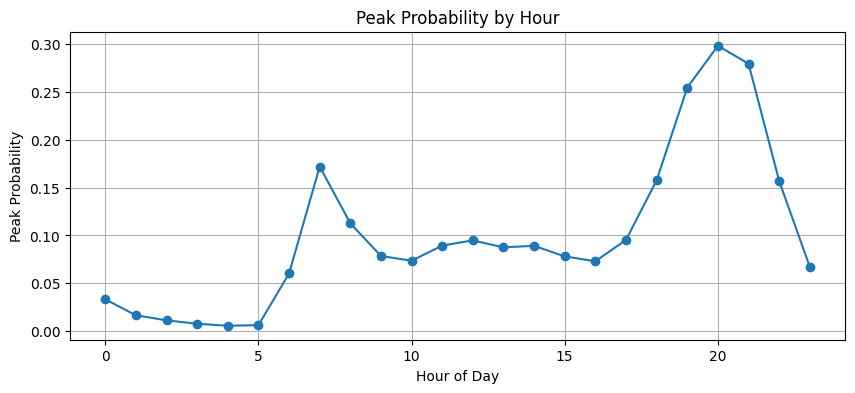

Datetime
0     0.033241
1     0.016586
2     0.011288
3     0.007668
4     0.005633
5     0.006188
6     0.060259
7     0.172068
8     0.112734
9     0.078568
10    0.073629
11    0.089463
12    0.094876
13    0.087567
14    0.089209
15    0.078140
16    0.073016
17    0.095380
18    0.157709
19    0.254669
20    0.298451
21    0.279622
22    0.156997
23    0.067199
Name: is_peak, dtype: float64

In [13]:
peak_by_hour = df.groupby(df.index.hour)["is_peak"].mean()

plt.figure(figsize=(10,4))
peak_by_hour.plot(marker="o")
plt.title("Peak Probability by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Peak Probability")
plt.grid(True)
plt.show()

peak_by_hour
